# Linear Regression

In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statistics as stat
import sympy
import seaborn as sns 
from sympy.abc import theta

import os 


### Loading Data

Number of training examples (m): 97
Number of features (n): 2


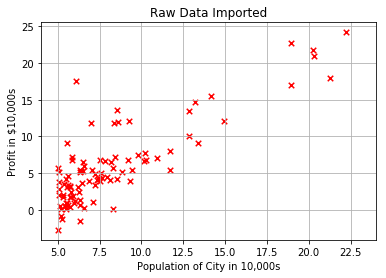

In [38]:
data = np.loadtxt('ex1data1.txt', delimiter = ',') #imports 96 x 2 array

#Add a column of ones to the data matrix that allows us to treat the intercept parameter as a feature.
X = np.c_[np.ones(len(data)),data[:,0]] 

y = np.c_[data[:,1]] # set y data to the second imported column
m, n = X.shape

#print('Number of features (n): %.0f'%(n))
print('Number of training examples (m): %.0f'%(m))
print('Number of features (n): %.0f'%(n))

#plot th raw data
%matplotlib inline
plt.figure()
plt.scatter(X[:,1], y, s = 30, c='r', marker = 'x', linewidths = 1)
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');
plt.title('Raw Data Imported')
plt.grid(True)


### Linear Regression with one Variable (Gradient Descent)

### Initialisation of Gradient Descent

In [32]:
#Inialize each of the two model parameters to zero.
theta_gd=[[0],[0]]   

# computre the cost function for a given
def computeCost(X, y, theta_gd):
    J = 0
    hypoth = X.dot(theta_gd) # determin the hypothesis
    J = 1 / (2 * m) * np.sum(np.square(hypoth - y)) # determine the cost function
    
    return(J) # return the cost function



In [33]:
J = computeCost(X, y, theta_gd) # run the cos function
print('The initial Parameters \n\t%s_1 = 0 \n\t%s_0 = 0 \n\tCost: %.3f'%(sympy.pretty(theta), sympy.pretty(theta),J))

The initial Parameters 
	θ_1 = 0 
	θ_0 = 0 
	Cost: 32.073


#### Implemet Gradient descent 


The parameter values for minimised cost function:
	θ_0: -3.788069
	θ_1: 1.182213


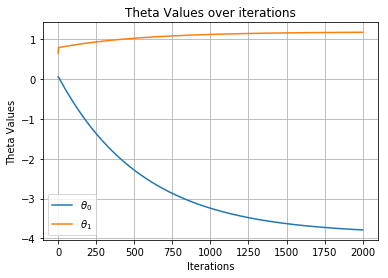

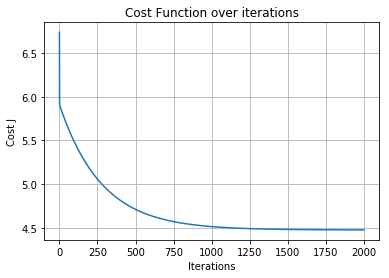

In [36]:
alpha = 0.01 #define the learning rate 
num_iters = 2000 # define the number of iterations of gradient descent
x_scale = np.arange(num_iters)

def gradientDescent(X, y, theta_gd, alpha, num_iters):
    for iter in np.arange(num_iters): #gradient descent iteration loop
        
        hypoth = X.dot(theta_gd) # determine the hypothesis for the current value of thetas
        dJ_theta_gd  = (1/m) * (X.T.dot(hypoth - y)) # Determine derivative of cost function
        theta_gd = theta_gd - alpha * dJ_theta_gd #calculate new values of theta
        
        # store calculated values of theta  
        theta_gd_history[iter][0] = theta_gd[0] 
        theta_gd_history[iter][1] = theta_gd[1]
        
        J_history[iter] = computeCost(X, y, theta_gd) #calclate the cost fucntion
        
    return(theta_gd, J_history, theta_gd_history) # return final theta and the list of cost function results

# run gradient descent to return final theta for minimum cost funtiona as well as all the cost function values 
#calculated (for each iteration)
theta_gd, J_history, theta_gd_history = gradientDescent(X, y, theta_gd, alpha, num_iters) 
print('\nThe parameter values for minimised cost function:')
print('\t%s_0: %f' %(sympy.pretty(theta),theta_gd[0]))  
print('\t%s_1: %f' %(sympy.pretty(theta), theta_gd[1]))  

# plot theta values as a function of iterations of gradient descent
%matplotlib inline
plt.figure()
plt.plot(x_scale, theta_gd_history)
plt.ylabel('Theta Values')
plt.xlabel('Iterations');
plt.title('Theta Values over iterations')
plt.grid(True)
plt.legend([r'$\theta_0$', r'$\theta_1$'])

# plot cost function histtory as a function of iterations of gradient descent
plt.figure()
plt.plot(x_scale, J_history)
plt.ylabel('Cost J')
plt.xlabel('Iterations');
plt.title('Cost Function over iterations')
plt.grid(True)

#### Compare Gradient Descent and sklearn

In [23]:

#detertine the y values according to the theta values from gradient descent
y_gd = X.dot(theta_gd) 
#determine the r^2 value
from sklearn.metrics import r2_score 
r2_gd = r2_score(y, y_gd) 

# determine the fit using linear regression classifier from sklearn
from sklearn.linear_model import LinearRegression # data classification, regeression, clustering etc
lr_regr = LinearRegression()
lr_regr.fit(X[:,1].reshape(-1,1), y.ravel())
theta_lr = np.zeros(2)
theta_lr[0] = lr_regr.intercept_
theta_lr[1] = lr_regr.coef_
y_lr = X.dot(theta_lr)
r2_lr = r2_score(y, y_lr) 

print('Goodness of fit for Gradient Descent r^2: %.3f'%(r2_gd))
print('Goodness of fit for Sk.learn leanear model r^2: %.3f'%(r2_lr))


Goodness of fit for Gradient Descent r^2: 0.702
Goodness of fit for Sk.learn leanear model r^2: 0.702


### Profit Prediction

In [83]:
# Predct profit for a city with population of 35000 and 70000
print('Predict profit for a city with population of:') 
print('GRADIENT DESCENT:')
print('\tPopulation of %.0f : $%.0f' %(35000, theta_gd.T.dot([1, 3.5]) * 10000))
print('\tPopulation of %.0f : $%.0f' %(70000,theta_gd.T.dot([1, 7]) * 10000))
print('SKLEARN:')
print('\tPopulation of %.0f : $%.0f' %(35000, theta_lr.T.dot([1, 3.5]) * 10000))
print('\tPopulation of %.0f : $%.0f' %(70000,theta_lr.T.dot([1, 7]) * 10000))

Predict profit for a city with population of:
GRADIENT DESCENT:
	Population of 35000 : $3497
	Population of 70000 : $44874
SKLEARN:
	Population of 35000 : $2798
	Population of 70000 : $44555


#### Summary of results

-----------------------------------------------------------------
			FITING RESULTS GRADIENT DESCENT
-----------------------------------------------------------------

Fitting: GRADIENT DESCENT
Learning rate (alpha): 0.01
Number of iterations: 2000
Fitting parameters:
	Intercept θ_0: -3.788
	Slope θ_1: 1.182
Goodness of fit r^2: 0.702
PREDICTIONS:
	Population of 35000 : $3497
	Population of 70000 : $44874
-----------------------------------------------------------------
			FITING RESULTS SKLEARN
-----------------------------------------------------------------

Fitting: Linear Regression SKLEARN
Fitting parameters:
	Intercept θ_0: -3.896
	Slope θ_1: 1.193
Goodness of fit r^2: 0.702
PREDICTIONS:
	Population of 35000 : $2798
	Population of 70000 : $44555


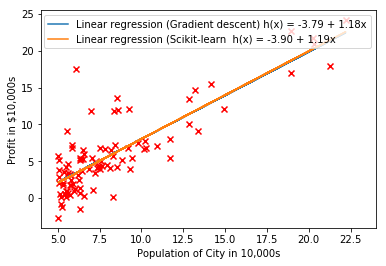

In [40]:
print('-----------------------------------------------------------------')
print('\t\t\tFITING RESULTS GRADIENT DESCENT')
print('-----------------------------------------------------------------')
print('\nFitting: GRADIENT DESCENT')
print('Learning rate (alpha): %.2f'%(alpha))
print('Number of iterations: %.0f'%(num_iters))
print('Fitting parameters:')
print('\tIntercept %s_0: %.3f'%(sympy.pretty(theta), theta_gd[0]))
print('\tSlope %s_1: %.3f'%(sympy.pretty(theta), theta_gd[1]))
print('Goodness of fit r^2: %.3f'%(r2_gd))
print('PREDICTIONS:')
print('\tPopulation of %.0f : $%.0f' %(35000, theta_gd.T.dot([1, 3.5]) * 10000))
print('\tPopulation of %.0f : $%.0f' %(70000,theta_gd.T.dot([1, 7]) * 10000))

print('-----------------------------------------------------------------')
print('\t\t\tFITING RESULTS SKLEARN')
print('-----------------------------------------------------------------')
print('\nFitting: Linear Regression SKLEARN')
print('Fitting parameters:')
print('\tIntercept %s_0: %.3f'%(sympy.pretty(theta), theta_lr[0]))
print('\tSlope %s_1: %.3f'%(sympy.pretty(theta), theta_lr[1]))
print('Goodness of fit r^2: %.3f'%(r2_lr))
print('PREDICTIONS:')
print('\tPopulation of %.0f : $%.0f' %(35000, theta_lr.T.dot([1, 3.5]) * 10000))
print('\tPopulation of %.0f : $%.0f' %(70000,theta_lr.T.dot([1, 7]) * 10000))

# Plot gradient descent & Scikit-learn Linear regression 
plt.figure()
plt.scatter(X[:,1], y, c = 'r', marker = 'x', linewidths = 2)
plt.plot(X[:,1], y_gd, label = 'Linear regression (Gradient descent) h(x) = %.2f + %.2fx'%(theta_gd[0],theta_gd[1])) 
plt.plot(X[:,1],y_lr , label = 'Linear regression (Scikit-learn  h(x) = %.2f + %.2fx'%(theta_lr[0],theta_lr[1]))
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend()
